# Analyzing Forensic E-Mail Data using NLP Techniques

Digital forensic investigations often encounter textual data. This course module / notebook introduces analysis techniques relevant for digital forensics of email text content.

## What We Will Be Doing

We will be showing you how to organize and manipulate email data on various verticals, such as how to perform time-based analysis, participant-base analysis, and email content-base analysis. We will show you how to perform basic text-preprocessing in NLP.

## Learning Goals
1. learn techniques to display or visualize the data characteristics of text data  
2. learn different modeling techniques for text data
3. explore analysis techniques based on individual models that can be applied to e-mail data

## Acquiring Forensic E-Mail Data

This demonstration is based on the classic Enron E-Mail Dataset (https://www.cs.cmu.edu/~./enron/). The dataset contains the e-mails from approximately 150 users, mostly senior management of Enron.

## Descriptive Statistics of the Dataset

First, we will import the necessary libs.

In [ ]:
import os, sys, email
import numpy as np 
import pandas as pd
import zipfile
import string
import re
import itertools
import collections

from google.colab import drive
drive.mount('/content/drive/')

from subprocess import check_output

# Network
import networkx as nx
!pip install nxviz
import nxviz as nv

# Plotting
!pip install matplotlib==3.1.3

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('whitegrid')
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import wordcloud

# NLP

import gensim
from gensim import corpora

import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize.regexp import RegexpTokenizer
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS


!pip install scikit-build
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_blobs


import warnings
# warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

Mounted at /content/drive/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 6.3 MB/s 
     |████████████████████████████████| 965 kB 48.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


/usr/local/lib/python3.7/dist-packages/nxviz/__init__.py:29: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  """


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 3.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nxviz 0.7.4 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=9af45ce1f1b33dce83c479c831a230d38316023b5dcb2f3a7dcf227067792604
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=e59602d697764dba58d93bf7a6041216e4efd1ab48531527042548d16ebfd14a
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 78 kB 3.1 MB/s 


### Dataset Loading

We will load the dataset and make represent them in tablular form so that we can manipulate them for various operations.

#### First time dataset download

In [ ]:
!wget https://www.cs.cmu.edu/~./enron/enron_mail_20150507.tar.gz
!tar -xzvf enron_mail_20150507.tar.gz

In [ ]:
print(check_output(["ls", "maildir"]).decode("utf8"))

In [ ]:
# Reading the files one by one
email_rows = []

for root, dirs, files in os.walk('maildir'):
    for file in files:
        with open(os.path.join(root, file), "r", encoding='utf-8', errors='ignore') as email_content:
            contents = email_content.read()
            email_rows.append([root+'/'+file, contents])
            # print(root, file, contents)
print(len(email_rows))
print(email_rows[0])

In [ ]:
# converting to pandas dataframe
emails_df = pd.DataFrame(email_rows, columns = ['file','message'])
print(emails_df.shape)
emails_df.head()

We will be saving the loaded dataset in a csv file in the google drive so that we don't need to download the dataset everytime we run.

In [ ]:
emails_df.to_csv('/content/drive/MyDrive/emails.tsv', sep='\t', encoding='utf-8', index=False)

#### Load from google drive

If you have already saved the data in the drive before, you can always load it from here.

In [ ]:
emails_df = pd.read_csv('/content/drive/MyDrive/emails.tsv', delimiter='\t')
print(emails_df.shape)
emails_df.head()

(517401, 2)


,file,message
0,maildir/stclair-c/mega_morgan_assignment/4.,Message-ID: <16368324.1075842203044.JavaMail.e...
1,maildir/stclair-c/mega_morgan_assignment/6.,Message-ID: <239524.1075842203091.JavaMail.eva...
2,maildir/stclair-c/mega_morgan_assignment/1.,Message-ID: <12332244.1075842202972.JavaMail.e...
3,maildir/stclair-c/mega_morgan_assignment/5.,Message-ID: <23188847.1075842203068.JavaMail.e...
4,maildir/stclair-c/mega_morgan_assignment/2.,Message-ID: <2304317.1075842202998.JavaMail.ev...


Let's check what is the content of an email:

In [ ]:
print(emails_df['message'][0])

Message-ID: <16368324.1075842203044.JavaMail.evans@thyme>
Date: Wed, 6 Jun 2001 08:32:00 -0700 (PDT)
From: wendy.conwell@enron.com
To: rhonda.denton@enron.com
Subject: RE: MEGA Deals to Assigned
Cc: melissa.murphy@enron.com, carol.clair@enron.com, tracy.ngo@enron.com, 
	christian.yoder@enron.com
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
Bcc: melissa.murphy@enron.com, carol.clair@enron.com, tracy.ngo@enron.com, 
	christian.yoder@enron.com
X-From: Wendy Conwell
X-To: Rhonda L Denton
X-cc: Melissa Ann Murphy, Carol St Clair, Tracy Ngo, Christian Yoder
X-bcc: 
X-Folder: \Carol_StClair_June2001\Notes Folders\Mega_morgan assignment
X-Origin: STCLAIR-C
X-FileName: cstclai.nsf

Ooops, meant to say assigning All transactions with "EPMI" to "Morgan" NOT 
"ENA"!!!  See what happens when I rush around like a chicken with her head 
cut off!

 -----Original Message-----
From:  Conwell, Wendy  
Sent: Wednesday, June 06, 2001 3:31 PM
To: Denton, Rhond

### Setup 

Each message has some keys, such as, Date, From, To, Subject, etc. To maninupate the data, we need to parse these keys. Let's look at those keys.

In [ ]:
# Parse the emails into a list email objects
messages = list(map(email.message_from_string, emails_df['message']))

# Get fields from parsed email objects
keys = messages[0].keys()
keys

['Message-ID',
 'Date',
 'From',
 'To',
 'Subject',
 'Cc',
 'Mime-Version',
 'Content-Type',
 'Content-Transfer-Encoding',
 'Bcc',
 'X-From',
 'X-To',
 'X-cc',
 'X-bcc',
 'X-Folder',
 'X-Origin',
 'X-FileName']

Now we will create a dataframe using these keys and their respective values so that we can manipulate them. 

We will read the email text and save as `content`. 

Note that in email `To`, there can be more than one receivers. We will split this.

In [ ]:
## Helper functions
def get_text_from_email(msg, max_word_len=30):
    '''To get the content from email objects'''
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            payload = part.get_payload()
            payload = ' '.join(filter(lambda x: len(x) < max_word_len,  payload.split()))
            parts.append( payload )
    return ''.join(parts)

def split_email_addresses(line):
    '''To separate multiple email addresses'''
    if line:
        addrs = line.split(',')
        addrs = frozenset(map(lambda x: x.strip(), addrs))
    else:
        addrs = None
    return addrs


In [ ]:
for key in keys:
    emails_df[key] = [doc[key] for doc in messages]
emails_df['content'] = list(map(get_text_from_email, messages))    

emails_df['From'] = emails_df['From'].map(split_email_addresses)
emails_df['To'] = emails_df['To'].map(split_email_addresses)


emails_df['user'] = emails_df['file'].map(lambda x:x.split('/')[1])

del messages
emails_df.drop('message', axis=1, inplace=True)

In [ ]:
emails_df.head()

,file,Message-ID,Date,From,To,Subject,Cc,Mime-Version,Content-Type,Content-Transfer-Encoding,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user
0,maildir/stclair-c/mega_morgan_assignment/4.,<16368324.1075842203044.JavaMail.evans@thyme>,"Wed, 6 Jun 2001 08:32:00 -0700 (PDT)",(wendy.conwell@enron.com),(rhonda.denton@enron.com),RE: MEGA Deals to Assigned,"melissa.murphy@enron.com, carol.clair@enron.co...",1.0,text/plain; charset=us-ascii,7bit,"melissa.murphy@enron.com, carol.clair@enron.co...",Wendy Conwell,Rhonda L Denton,"Melissa Ann Murphy, Carol St Clair, Tracy Ngo,...",,\Carol_StClair_June2001\Notes Folders\Mega_mor...,STCLAIR-C,cstclai.nsf,"Ooops, meant to say assigning All transactions...",stclair-c
1,maildir/stclair-c/mega_morgan_assignment/6.,<239524.1075842203091.JavaMail.evans@thyme>,"Thu, 7 Jun 2001 03:59:00 -0700 (PDT)",(christian.yoder@enron.com),"(carol.clair@enron.com, wendy.conwell@enron.co...",RE: MEGA Deals to Assigned,None,1.0,text/plain; charset=us-ascii,7bit,None,Christian Yoder,"Carol St Clair, Wendy Conwell, Rhonda L Denton...",,,\Carol_StClair_June2001\Notes Folders\Mega_mor...,STCLAIR-C,cstclai.nsf,"In an hour or so, I will be sending Carol a pa...",stclair-c
2,maildir/stclair-c/mega_morgan_assignment/1.,<12332244.1075842202972.JavaMail.evans@thyme>,"Wed, 6 Jun 2001 05:34:00 -0700 (PDT)",(rhonda.denton@enron.com),(carol.clair@enron.com),Re: MEGA Assignment,None,1.0,text/plain; charset=us-ascii,7bit,None,Rhonda L Denton,Carol St Clair,,,\Carol_StClair_June2001\Notes Folders\Mega_mor...,STCLAIR-C,cstclai.nsf,Debbie Hart at Morgan Stanley is the contact (...,stclair-c
3,maildir/stclair-c/mega_morgan_assignment/5.,<23188847.1075842203068.JavaMail.evans@thyme>,"Wed, 6 Jun 2001 09:58:00 -0700 (PDT)",(rhonda.denton@enron.com),(wendy.conwell@enron.com),RE: MEGA Deals to Assigned,"melissa.murphy@enron.com, carol.clair@enron.co...",1.0,text/plain; charset=us-ascii,7bit,"melissa.murphy@enron.com, carol.clair@enron.co...",Rhonda L Denton,Wendy Conwell,"Melissa Ann Murphy, Carol St Clair, Tracy Ngo,...",,\Carol_StClair_June2001\Notes Folders\Mega_mor...,STCLAIR-C,cstclai.nsf,The following deal confirmations do not contai...,stclair-c
4,maildir/stclair-c/mega_morgan_assignment/2.,<2304317.1075842202998.JavaMail.evans@thyme>,"Wed, 6 Jun 2001 07:53:00 -0700 (PDT)",(wendy.conwell@enron.com),(rhonda.denton@enron.com),MEGA Deals to Assigned,"melissa.murphy@enron.com, carol.clair@enron.co...",1.0,text/plain; charset=us-ascii,7bit,"melissa.murphy@enron.com, carol.clair@enron.co...",Wendy Conwell,Rhonda L Denton,"Melissa Ann Murphy, Carol St Clair, Tracy Ngo,...",,\Carol_StClair_June2001\Notes Folders\Mega_mor...,STCLAIR-C,cstclai.nsf,Please find attached a spreadsheet which match...,stclair-c


Let's check whether we have parsed the keys correctly or not.

In [ ]:
print('shape of the dataframe:', emails_df.shape)
emails_df.columns

shape of the dataframe: (517401, 20)


Index(['file', 'Message-ID', 'Date', 'From', 'To', 'Subject', 'Cc',
       'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding', 'Bcc',
       'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName',
       'content', 'user'],
      dtype='object')

Let's find out the number of unique values in each columns.

In [ ]:
for col in emails_df.columns:
    print(col, emails_df["content"].nunique())
    
print("content length: {}".format(emails_df["content"].map(len).max()))

file 241860
Message-ID 241860
Date 241860
From 241860
To 241860
Subject 241860
Cc 241860
Mime-Version 241860
Content-Type 241860
Content-Transfer-Encoding 241860
Bcc 241860
X-From 241860
X-To 241860
X-cc 241860
X-bcc 241860
X-Folder 241860
X-Origin 241860
X-FileName 241860
content 241860
user 241860
content length: 737640


Each email has an unique Message-ID. Let's set this as the index. There are also some non-important columns such as  Mime-version, Content-Type, etc. Let's drop them. 

In [ ]:
emails_df = emails_df.set_index('Message-ID')\
    .drop(['Mime-Version', 'Content-Type', 'Content-Transfer-Encoding'], axis=1)

In [ ]:
emails_df.head()

,file,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user
Message-ID,,,,,,,,,,,,,,,,
<16368324.1075842203044.JavaMail.evans@thyme>,maildir/stclair-c/mega_morgan_assignment/4.,"Wed, 6 Jun 2001 08:32:00 -0700 (PDT)",(wendy.conwell@enron.com),(rhonda.denton@enron.com),RE: MEGA Deals to Assigned,"melissa.murphy@enron.com, carol.clair@enron.co...","melissa.murphy@enron.com, carol.clair@enron.co...",Wendy Conwell,Rhonda L Denton,"Melissa Ann Murphy, Carol St Clair, Tracy Ngo,...",,\Carol_StClair_June2001\Notes Folders\Mega_mor...,STCLAIR-C,cstclai.nsf,"Ooops, meant to say assigning All transactions...",stclair-c
<239524.1075842203091.JavaMail.evans@thyme>,maildir/stclair-c/mega_morgan_assignment/6.,"Thu, 7 Jun 2001 03:59:00 -0700 (PDT)",(christian.yoder@enron.com),"(carol.clair@enron.com, wendy.conwell@enron.co...",RE: MEGA Deals to Assigned,None,None,Christian Yoder,"Carol St Clair, Wendy Conwell, Rhonda L Denton...",,,\Carol_StClair_June2001\Notes Folders\Mega_mor...,STCLAIR-C,cstclai.nsf,"In an hour or so, I will be sending Carol a pa...",stclair-c
<12332244.1075842202972.JavaMail.evans@thyme>,maildir/stclair-c/mega_morgan_assignment/1.,"Wed, 6 Jun 2001 05:34:00 -0700 (PDT)",(rhonda.denton@enron.com),(carol.clair@enron.com),Re: MEGA Assignment,None,None,Rhonda L Denton,Carol St Clair,,,\Carol_StClair_June2001\Notes Folders\Mega_mor...,STCLAIR-C,cstclai.nsf,Debbie Hart at Morgan Stanley is the contact (...,stclair-c
<23188847.1075842203068.JavaMail.evans@thyme>,maildir/stclair-c/mega_morgan_assignment/5.,"Wed, 6 Jun 2001 09:58:00 -0700 (PDT)",(rhonda.denton@enron.com),(wendy.conwell@enron.com),RE: MEGA Deals to Assigned,"melissa.murphy@enron.com, carol.clair@enron.co...","melissa.murphy@enron.com, carol.clair@enron.co...",Rhonda L Denton,Wendy Conwell,"Melissa Ann Murphy, Carol St Clair, Tracy Ngo,...",,\Carol_StClair_June2001\Notes Folders\Mega_mor...,STCLAIR-C,cstclai.nsf,The following deal confirmations do not contai...,stclair-c
<2304317.1075842202998.JavaMail.evans@thyme>,maildir/stclair-c/mega_morgan_assignment/2.,"Wed, 6 Jun 2001 07:53:00 -0700 (PDT)",(wendy.conwell@enron.com),(rhonda.denton@enron.com),MEGA Deals to Assigned,"melissa.murphy@enron.com, carol.clair@enron.co...","melissa.murphy@enron.com, carol.clair@enron.co...",Wendy Conwell,Rhonda L Denton,"Melissa Ann Murphy, Carol St Clair, Tracy Ngo,...",,\Carol_StClair_June2001\Notes Folders\Mega_mor...,STCLAIR-C,cstclai.nsf,Please find attached a spreadsheet which match...,stclair-c


In [ ]:
emails_df.dtypes

file          object
Date          object
From          object
To            object
Subject       object
Cc            object
Bcc           object
X-From        object
X-To          object
X-cc          object
X-bcc         object
X-Folder      object
X-Origin      object
X-FileName    object
content       object
user          object
dtype: object

The Date type is object. Let's convert it to datetime format as manipulating date is easier when it's format is datetime.

In [ ]:
# Parse datetime
emails_df['Date'] = pd.to_datetime(emails_df['Date'], infer_datetime_format=True, utc=True)
emails_df.dtypes

file                       object
Date          datetime64[ns, UTC]
From                       object
To                         object
Subject                    object
Cc                         object
Bcc                        object
X-From                     object
X-To                       object
X-cc                       object
X-bcc                      object
X-Folder                   object
X-Origin                   object
X-FileName                 object
content                    object
user                       object
dtype: object

### Time-based analysis

#### Which year did people send those emails?

Text(0, 0.5, 'Number of emails')

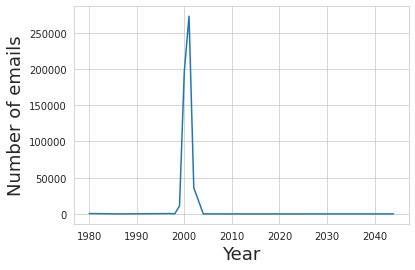

In [ ]:
ax = emails_df.groupby(emails_df['Date'].dt.year)['content'].count().plot()
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Number of emails', fontsize=18)

In [ ]:
emails_df['Year'] = emails_df['Date'].dt.year
emails_df.groupby(['user', 'Year'])['content'].count().head(20)

user      Year
allen-p   1980      10
          1999       8
          2000    1307
          2001    1704
          2002       5
arnold-j  1980       8
          2000    1832
          2001    3056
          2002       2
arora-h   1980       2
          2000      62
          2001     580
          2002      10
badeer-r  2000     851
          2001       2
          2002      24
bailey-s  2000       1
          2001     127
          2002     350
bass-e    1980       6
Name: content, dtype: int64

#### Which weekday did people send those emails?

Text(0, 0.5, 'Number of emails')

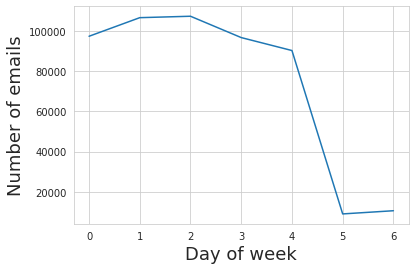

In [ ]:
ax = emails_df.groupby(emails_df['Date'].dt.dayofweek)['content'].count().plot()
ax.set_xlabel('Day of week', fontsize=18)
ax.set_ylabel('Number of emails', fontsize=18)

#### Which hours did people send those emails?

Text(0, 0.5, 'Number of emails')

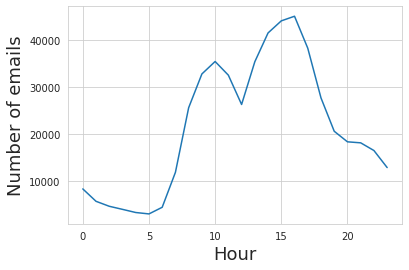

In [ ]:
ax = emails_df.groupby(emails_df['Date'].dt.hour)['content'].count().plot()
ax.set_xlabel('Hour', fontsize=18)
ax.set_ylabel('Number of emails', fontsize=18)

### Participant-based analysis

#### Who are top frequent users?

In [ ]:
top_10_frequent = emails_df.groupby('user')['user'].count().sort_values(ascending = False)[:10]
top_10_frequent

user
kaminski-v      28465
dasovich-j      28234
kean-s          25351
mann-k          23381
jones-t         19950
shackleton-s    18687
taylor-m        13875
farmer-d        13032
germany-c       12436
beck-s          11830
Name: user, dtype: int64

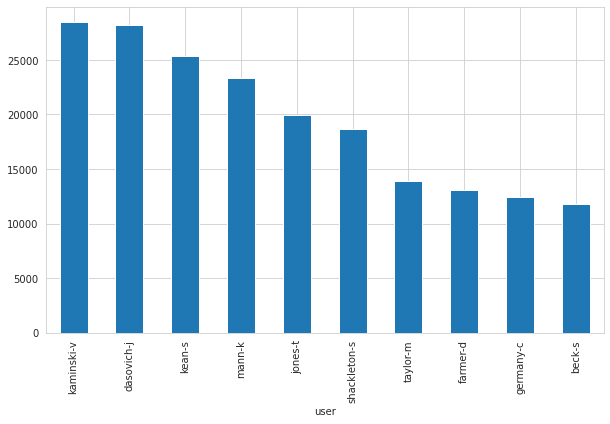

In [ ]:
plt.figure(figsize = (10,6))
top_10_frequent.plot(kind = 'bar')

#### Who sends most emails?

We will group the `From` aggredated by `Date`. That will give email count by each senders.

In [ ]:
sub_df = emails_df[['From', 'content', 'Date']].dropna()
display(sub_df.shape)

grouped_by_people = sub_df.groupby('From').agg({
        'Date': 'count'
})
grouped_by_people.rename(columns={'Date': 'Count'}, inplace=True)
grouped_by_people.sort_values('Count', ascending=False).head()

(517401, 3)

,Count
From,
(kay.mann@enron.com),16735
(vince.kaminski@enron.com),14368
(jeff.dasovich@enron.com),11411
(pete.davis@enron.com),9149
(chris.germany@enron.com),8801


Another way to do:

In [ ]:
sub_df = emails_df[['From', 'content', 'Date']].dropna()

# Unpack frozensets
sub_df['From'] = sub_df['From'].map(lambda x: next(iter(x)))
display(sub_df.shape)

grouped_by_people = sub_df.groupby('From').agg({
        'Date': 'count'
})
grouped_by_people.rename(columns={'Date': 'Count'}, inplace=True)
display(grouped_by_people['Count'].sum())
grouped_by_people.sort_values('Count', ascending=False).head()

(517401, 3)

517401

,Count
From,
kay.mann@enron.com,16735
vince.kaminski@enron.com,14368
jeff.dasovich@enron.com,11411
pete.davis@enron.com,9149
chris.germany@enron.com,8801


#### Who receives most emails?

First need to unpack `'To'` as there can be multuple receivers.

In [ ]:
sub_df = emails_df[['To', 'content', 'Date']].dropna()

# Unpack frozensets
sub_df['To'] = sub_df['To'].map(lambda x: next(iter(x)))
display(sub_df.shape)

grouped_by_people = sub_df.groupby('To').agg({
        'Date': 'count'
})
grouped_by_people.rename(columns={'Date': 'Count'}, inplace=True)
display(grouped_by_people['Count'].sum())
grouped_by_people.sort_values('Count', ascending=False).head()

(495554, 3)

495554

,Count
To,
pete.davis@enron.com,9156
tana.jones@enron.com,6007
sara.shackleton@enron.com,5292
vkaminski@aol.com,4886
jeff.dasovich@enron.com,4684


#### Who are most involved with emails?

In [ ]:
# Count words in Subjects and content
tokenizer = RegexpTokenizer(r'(?u)\b\w\w+\b')
emails_df['subject_wc'] = emails_df['Subject'].map(lambda x: len(tokenizer.tokenize(x)))
emails_df['content_wc'] = emails_df['content'].map(lambda x: len(tokenizer.tokenize(x)))


In [ ]:
grouped_by_people = emails_df.groupby('user').agg({
        'content': 'count', 
        'subject_wc': 'mean',
        'content_wc': 'mean',
    })
grouped_by_people.rename(columns={'content': 'Number of emails', 
                                  'subject_wc': 'Subject word count', 
                                  'content_wc': 'Content word count'}, inplace=True)

In [ ]:
grouped_by_people.sort_values('Number of emails', ascending=False).head()

,Number of emails,Subject word count,Content word count
user,,,
kaminski-v,28465,4.217530,249.008923
dasovich-j,28234,5.237373,594.015690
kean-s,25351,4.959331,483.310836
mann-k,23381,4.211796,204.487618
jones-t,19950,4.748221,182.072481


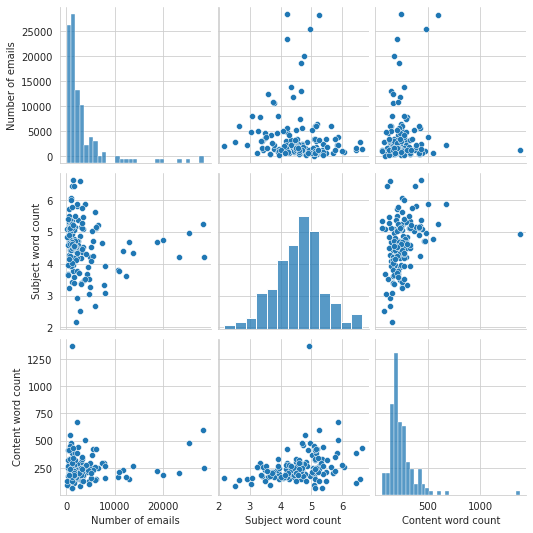

In [ ]:
sns.pairplot(grouped_by_people.reset_index())
# sns.pairplot(grouped_by_people.reset_index(), hue='user')

#### Who sends the most emails to whom?

In [ ]:
sub_df = emails_df[['From', 'To', 'Date']].dropna()
display(sub_df.shape)

# Unpack frozensets
sub_df['From'] = sub_df['From'].map(lambda x: next(iter(x)))
sub_df['To'] = sub_df['To'].map(lambda x: next(iter(x)))

sub_df = sub_df.groupby(['From', 'To']).count().reset_index()

# rename column
sub_df.rename(columns={'Date': 'count'}, inplace=True)
sub_df.sort_values('count', ascending=False).head(10)

(495554, 3)

,From,To,count
55159,pete.davis@enron.com,pete.davis@enron.com,9141
74176,vince.kaminski@enron.com,vkaminski@aol.com,4316
20022,enron.announcements@enron.com,all.worldwide@enron.com,2206
20015,enron.announcements@enron.com,all.houston@enron.com,1701
37184,kay.mann@enron.com,suzanne.adams@enron.com,1528
30235,jeff.dasovich@enron.com,paul.kaufman@enron.com,1478
74105,vince.kaminski@enron.com,shirley.crenshaw@enron.com,1220
37085,kay.mann@enron.com,nmann@erac.com,1020
30028,jeff.dasovich@enron.com,james.wright@enron.com,1015
67570,steven.kean@enron.com,maureen.mcvicker@enron.com,1014


Apparently some people send a lot of emails to themselves. It might be interesting to look what type of content one sends to themselves.

#### Network

Let's build a network of email sender and receipients. 

The operations can be kernel heavy. So we will just sample a small chunk of of the dataset and build our network. Let's sample the emails from or to `steven.kean@enron.com`.

In [ ]:
# sub_df_sampled = sub_df[sub_df['From']=='steven.kean@enron.com']

sub_df_sampled = sub_df[(sub_df['From']=='steven.kean@enron.com') | 
                        (sub_df['To']=='steven.kean@enron.com')].sample(50)

G = nx.from_pandas_edgelist(sub_df_sampled, 'From', 'To', edge_attr='count', create_using=nx.DiGraph())
print('Number of nodes: %d, Number of edges: %d' % (G.number_of_nodes(), G.number_of_edges()))

Number of nodes: 50, Number of edges: 50


In [ ]:
display(G.in_degree)
display(G.out_degree)

InDegreeView({'janel.guerrero@enron.com': 0, 'steven.kean@enron.com': 20, 'jackie.gentle@enron.com': 0, 'michael.tribolet@enron.com': 0, 'jeffrey.sherrick@enron.com': 1, 'sharon.butcher@enron.com': 1, 'lisa.jacobson@enron.com': 0, 'b..sanders@enron.com': 1, 'james.steffew@enron.com': 1, 'john.ambler@enron.com': 0, 'robert.hemstock@enron.com': 1, 'carolyn.green@enron.com': 0, 'dennis.benevides@enron.com': 1, 'joannie.williamson@enron.com': 1, 'elizabeth.linnell@enron.com': 1, 'david.cromley@enron.com': 0, 'akim@m-g.com': 1, 'mark.schroeder@enron.com': 1, 'mark.lay@enron.com': 1, 'david.leboe@enron.com': 0, 'mary.schoen@enron.com': 0, 'paul.kaufman@enron.com': 0, 'paula.rieker@enron.com': 0, 'martin.bucknell@enron.com': 1, 'laura.schwartz@enron.com': 1, 'mary.hain@enron.com': 0, 'michael.harris@enron.com': 0, 'arquella.hargrove@enron.com': 0, 'jane.m.tholt@enron.com': 1, 'susan.skarness@enron.com': 1, 'robin.kittel@enron.com': 1, 'stephen.horn@enron.com': 1, 'maureen.raymond@enron.com': 

OutDegreeView({'janel.guerrero@enron.com': 1, 'steven.kean@enron.com': 30, 'jackie.gentle@enron.com': 1, 'michael.tribolet@enron.com': 1, 'jeffrey.sherrick@enron.com': 0, 'sharon.butcher@enron.com': 0, 'lisa.jacobson@enron.com': 1, 'b..sanders@enron.com': 0, 'james.steffew@enron.com': 0, 'john.ambler@enron.com': 1, 'robert.hemstock@enron.com': 0, 'carolyn.green@enron.com': 1, 'dennis.benevides@enron.com': 0, 'joannie.williamson@enron.com': 0, 'elizabeth.linnell@enron.com': 0, 'david.cromley@enron.com': 1, 'akim@m-g.com': 0, 'mark.schroeder@enron.com': 0, 'mark.lay@enron.com': 0, 'david.leboe@enron.com': 1, 'mary.schoen@enron.com': 1, 'paul.kaufman@enron.com': 1, 'paula.rieker@enron.com': 1, 'martin.bucknell@enron.com': 0, 'laura.schwartz@enron.com': 0, 'mary.hain@enron.com': 1, 'michael.harris@enron.com': 1, 'arquella.hargrove@enron.com': 1, 'jane.m.tholt@enron.com': 0, 'susan.skarness@enron.com': 0, 'robin.kittel@enron.com': 1, 'stephen.horn@enron.com': 0, 'maureen.raymond@enron.com':

Text(0.5, 0, 'Out-degrees')

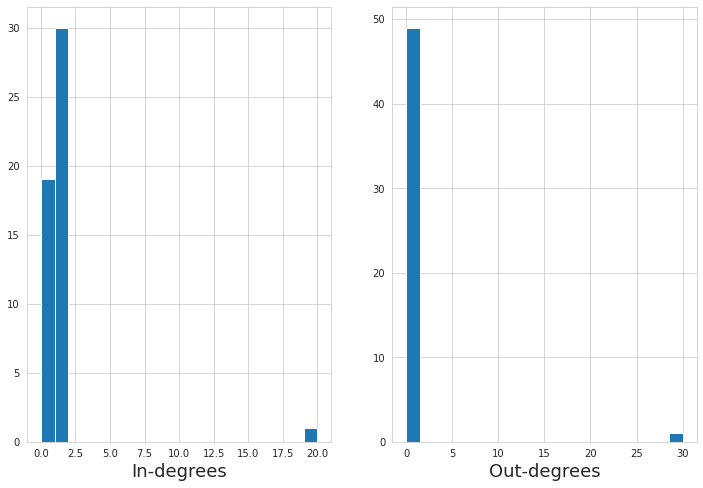

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 8))
ax1.hist(list(dict(G.in_degree).values()),  bins=20)
ax1.set_xlabel('In-degrees', fontsize=18)

ax2.hist(list(dict(G.out_degree).values()),  bins=20)
ax2.set_xlabel('Out-degrees', fontsize=18)

Now let's generate a couple of plots based on our network.

##### ArcPlot

Arc plots basically represent non-symmetric bilateral flows between a bunch of nodes grouped on a horizontal axis. Think of a network structure where the nodes are basically displayed on the x-axis, and the flows are the arcs. The x-axis is split into different spikes or wedges, where the size of the spike represent the total in- and outflows.

/usr/local/lib/python3.7/dist-packages/nxviz/api.py:276: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  "As of nxviz 0.7, the object-oriented API is being deprecated "


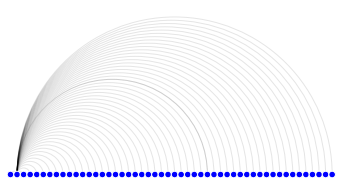

In [ ]:
plot = nv.ArcPlot(G)

We can see the nodes (employees) at the bottom and the dominance of the one node (`steven.kean@enron.com`) on the right side. 

##### CircosPlot
Circos plots visualizes data in a circular layout — this makes Circos ideal for exploring relationships between objects or positions.

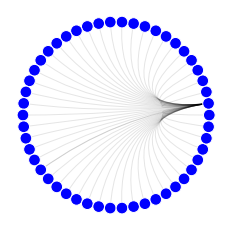

In [ ]:
plot = nv.CircosPlot(G)

However, these plots do not look like a traditional graph. Let's draw a tradition network graph.

##### Graph

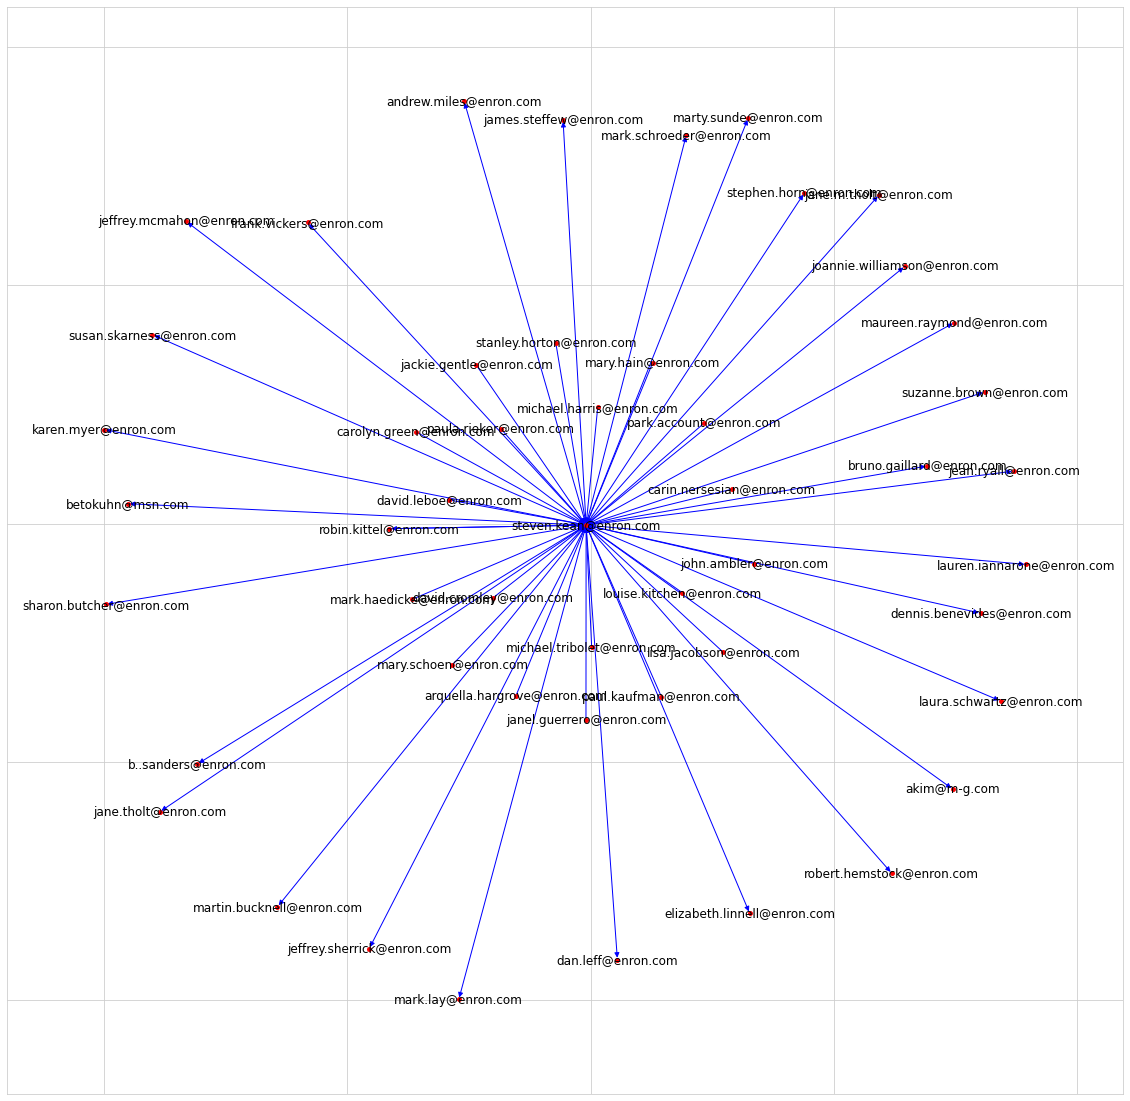

In [ ]:
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=.5)
nx.draw_networkx(G, pos, node_size=15, node_color='red',  edge_color='blue')
plt.show()

### Content-based analysis

Analyzing the whole dataset can be kernel heavy. We will sample a subset and perform our analysis on the sampled dataset.

In [ ]:
emails_df_sampled = emails_df.sample(1000)
emails_df_sampled.shape

(1000, 19)

We will mainly analysize `Subject` and `content`. Often text contains insignificant words. We call these words `stop words`. When we analyze text, these words are usually filtered out. Various NLP libraries provides list of stop words. You can also manually add stop words.

In [ ]:
other_stop_words = {'Enron', 'FW'}
stop_words = ENGLISH_STOP_WORDS.union(other_stop_words)

#### What do the emails say in the subject?

(-0.5, 799.5, 599.5, -0.5)

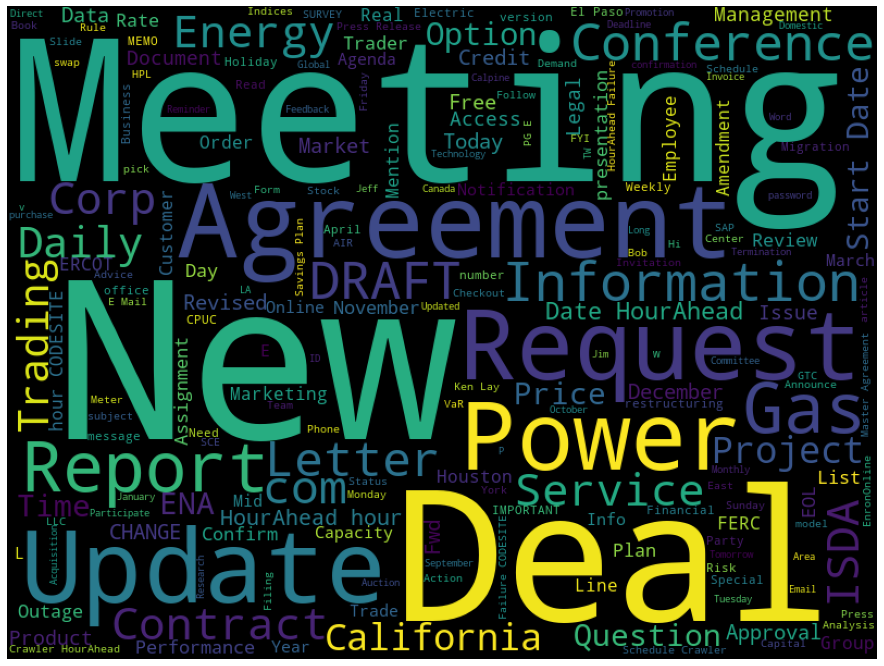

In [ ]:
subjects = ' '.join(emails_df_sampled['Subject'])
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=stop_words).generate(subjects)
ax.imshow(wc)
ax.axis("off")

#### What do the emails say in the contents?

(-0.5, 799.5, 599.5, -0.5)

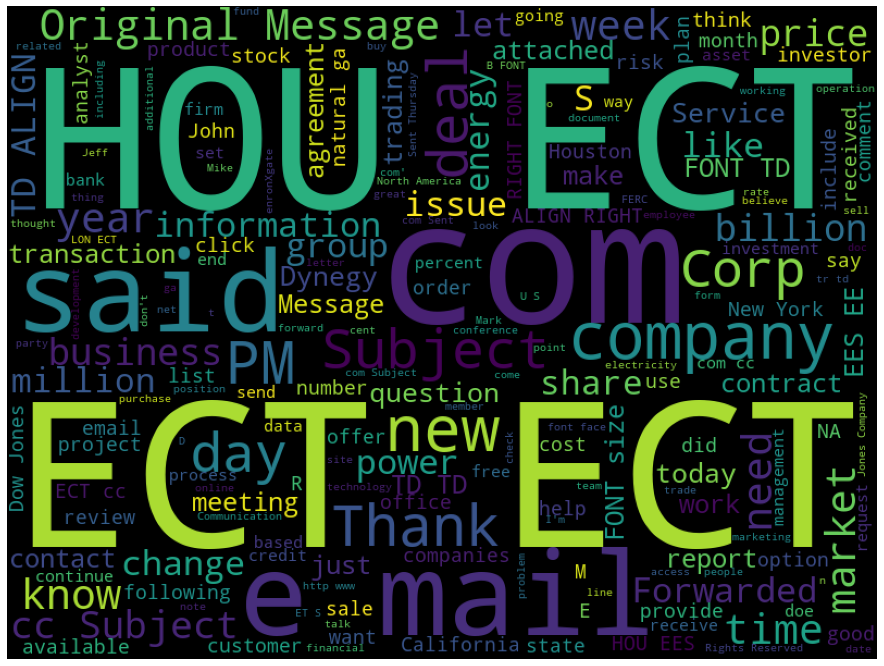

In [ ]:
contents = ' '.join(emails_df_sampled['content'])
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=stop_words).generate(contents)
ax.imshow(wc)
ax.axis("off")


#### Clustering

Text clustering is a process that involves NLP and the use of a clustering algorithm. This method of finding groups in unstructured texts can be applied in many different segments, such as feedback analysis, research segmentation, etc.

As the operations can be kernel heavy, we will sample a subset of the dataset.

In [ ]:
emails_df_sampled = emails_df.sample(1200)

As we have mentioned before, texts contains noises. text cleaning is removing unnecessary elements. The basic preprocessing includes removing stopwords and noise from text. Tocreate a more homogeneous corpus of text, we could lower case all characters.

Lastly, we can also do stem/lemmatize the words to their root form. This means we will transform words like `fishing`, `fishes`, `fish` to the root word `fish`.

In [ ]:
porter_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
sw=stopwords.words('english')

def text_cleaning(text):
    printable = set(string.printable)
    text = ''.join(filter(lambda x: x in printable, text))
    text = text.replace('\x00', ' ')  # remove nulls
    text = text.replace('\r', ' ')
    text = text.replace('\n', ' ')
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    text=re.sub("(<.*?>)","",text) # remove html markup
    text=re.sub("(\\W|\\d)"," ",text)     #remove non-ascii and digits
    text = text.lower() # Lowercasing

    def remove_sw(word_list):
        keep = []
        for word in word_list:
            if not word in sw:
                keep.append(word)
        return keep

    words= text.split()
    removed_stop_words=remove_sw (words)
    text = ' '.join([str(elem) for elem in removed_stop_words])


    # words= text.split()
    # stemmed_words=[porter_stemmer.stem(word=word) for word in words] # Stemming
    # text = ' '.join([str(elem) for elem in stemmed_words])

    # words= text.split()
    # lemmatized_words=[lemmatizer.lemmatize(word=word) for word in words] # Lemmatization
    # text = ' '.join([str(elem) for elem in lemmatized_words])

    text = text.strip()
    return text


emails_df_sampled['Subject_new'] = emails_df_sampled['Subject'].apply(text_cleaning)
emails_df_sampled['content_new'] = emails_df_sampled['content'].apply(text_cleaning)

In [ ]:
emails_df_sampled['Subject_new'].head()

Message-ID
<26208704.1075858702264.JavaMail.evans@thyme>                                        nerc question
<5584874.1075859005713.JavaMail.evans@thyme>                                credit watch list week
<11226948.1075858458237.JavaMail.evans@thyme>                               eol crude transactions
<32387590.1075860828747.JavaMail.evans@thyme>     demand ken lay donate proceeds enron stock sales
<30296250.1075858736138.JavaMail.evans@thyme>    enron net works enron global strategic sourcin...
Name: Subject_new, dtype: object

In [ ]:
emails_df_sampled['content_new'].head()

Message-ID
<26208704.1075858702264.JavaMail.evans@thyme>    may need push industry edge eisb nerc basicall...
<5584874.1075859005713.JavaMail.evans@thyme>     attached revised credit watch listing week ple...
<11226948.1075858458237.JavaMail.evans@thyme>    tom extracted crude trades clayton database sp...
<32387590.1075860828747.JavaMail.evans@thyme>    judy blaisdell hickory rd college station tx j...
<30296250.1075858736138.JavaMail.evans@thyme>    know enron net works enw enron global strategi...
Name: content_new, dtype: object

##### Vectorization

Text Vectorization is the process of converting text into numerical representation. There are a couple of ways to do that. We will follow Normalized TF-IDF version and use sklearn's `TfidfVectorizer`.

In [ ]:
data = emails_df_sampled['content_new']
tf_idf_vectorizor = TfidfVectorizer(stop_words = ENGLISH_STOP_WORDS, max_features = 5000)
tf_idf_array = normalize(tf_idf_vectorizor.fit_transform(data)).toarray()
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names_out()).head()

,aa,aaron,ab,abb,ability,able,abraham,abroad,absolutely,ac,...,york,young,younts,zander,zdnetonebox,zero,zimin,zipper,zone,zones
0,0.0,0.0,0.0,0.0,0.049299,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.072271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### K-means

K-means clustering is a type of unsupervised learning method. The goal of this algorithm is to find groups in the data, whereas the no. of groups is represented by the variable K. The data are clustered on the basis of high similarity points together and low similarity points in the separate clusters.

The `TfidfVectorizer` gives us a vector with lots of features. However, not all those features are important. It’s a common practice of reducing the features, Principal Component Analysis (PCA) is an unsupervised learning algorithm that is commonly used for this. PCA is widely used for feature extractions, noise filtering, etc. We will use PCA to reduce features.

In [ ]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
Y_sklearn.shape

(1200, 2)

We can use the Elbow method to have an indication of the clusters for our data. It consists in the interpretation of a line plot with an elbow shape. The number of clusters is were the elbow bends. 

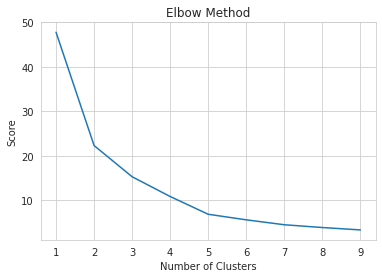

In [ ]:
number_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score = [i*-1 for i in score]

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()


The elbow method indicates our data has 2 clusters.

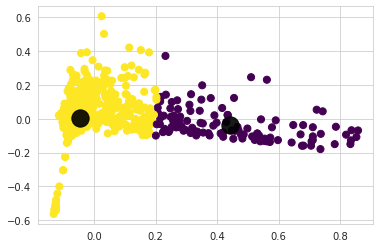

In [ ]:
n_clusters = 2
kmeans = KMeans(n_clusters= n_clusters, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.9);

Run the model by increasing the number of clusters and changing the number of components in PCA. Observe how the plots changes. 

##### Top features

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 20)

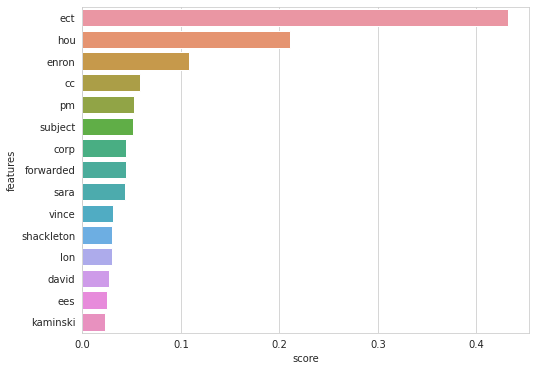

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[0][:15])

#### Topic Modeling

Topic Modeling is a technique to extract the hidden topics from large volumes of text. Latent Dirichlet Allocation(LDA) is a popular algorithm for topic modeling.

In NLP, Latent Dirichlet Allocation (LDA) is a generative statistical model that explains a set of observations through unobserved groups, and each group explains why some parts of the data are similar.

We will use the implementations of `gensim` library. We will need to build the dictionary first. Then we will provide the number of topics as well.


In [ ]:
text_clean=[]

for text in emails_df_sampled['content_new']:
    text_clean.append(text.split())

dictionary = corpora.Dictionary(text_clean)
text_term_matrix = [dictionary.doc2bow(text) for text in text_clean]

number_of_topics = 3

LDA = gensim.models.ldamodel.LdaModel
ldamodel = LDA(text_term_matrix, num_topics=number_of_topics, id2word = dictionary, passes=10)

# Show Topics
display(ldamodel.show_topics(formatted=False))

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)


[(0,
  [('ect', 0.027216353),
   ('enron', 0.02612366),
   ('com', 0.017494425),
   ('hou', 0.01355332),
   ('subject', 0.00947626),
   ('pm', 0.009468434),
   ('cc', 0.006259513),
   ('please', 0.0056358883),
   ('message', 0.005369218),
   ('corp', 0.004849846)]),
 (1,
  [('power', 0.008530516),
   ('enron', 0.008243184),
   ('said', 0.0069626644),
   ('energy', 0.0054516555),
   ('state', 0.005261893),
   ('would', 0.0044406247),
   ('company', 0.004293488),
   ('california', 0.003676613),
   ('market', 0.0032679173),
   ('e', 0.003129107)]),
 (2,
  [('com', 0.0113027645),
   ('enron', 0.0094080735),
   ('please', 0.0062613334),
   ('e', 0.005579957),
   ('information', 0.005140303),
   ('subject', 0.00469483),
   ('ect', 0.004610134),
   ('mail', 0.00420393),
   ('request', 0.004125479),
   ('would', 0.00356878)])]

In [ ]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel, text_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.122303 -0.029312       1        1  43.331328
0      0.109911 -0.040487       2        1  36.277500
2      0.012392  0.069800       3        1  20.391172, topic_info=        Term         Freq        Total Category  logprob  loglift
380      ect  2359.000000  2359.000000  Default  30.0000  30.0000
375      com  1963.000000  1963.000000  Default  29.0000  29.0000
385      hou  1142.000000  1142.000000  Default  28.0000  28.0000
38     enron  3211.000000  3211.000000  Default  27.0000  27.0000
94        pm   912.000000   912.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
73    market   108.389195   466.488403   Topic3  -6.0007   0.1306
380      ect   201.732240  2359.955449   Topic3  -5.3795  -0.8694
221   energy   121.622223   686.927871   Topic3  -5.8855  -0.1412
82      need    94.702318   354.251491   Topic3  -6.1357   0.2708
1406      us    90.735767   340.117618   Topic3  -6.1785   0.2687

[258 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
10971      2  0.963892        alias
12000      1  0.992422        align
12000      3  0.008202        align
366        1  0.536698         also
366        2  0.263087         also
...      ...       ...          ...
6864       3  0.018724        yards
282        1  0.774676         year
282        2  0.119665         year
282        3  0.103920         year
14419      1  0.989174  yellowstone

[456 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

Run the model by increasing or decreasing the number of topics and observe how the plots changes.


# Tasks to do by yourself

In [ ]:
emails_df_sampled = emails_df.sample(1000)
sampled_contents = emails_df_sampled['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (ENGLISH_STOP_WORDS)]))

In [ ]:
email_length_counts = sampled_contents.str.len()
mean_email_length = email_length_counts.mean()
std_email_length = email_length_counts.std()
email_length_counts.describe()

count     1000.000000
mean      1168.578000
std       2264.689125
min          0.000000
25%        199.000000
50%        588.000000
75%       1324.250000
max      39562.000000
Name: content, dtype: float64

## Top 15 words

1) Can you find top 15 common words in the `sampled_contents`? 

2) Can you find top 15 common adjective, adverb, and noun in the `sampled_contents`? (use pos_tag of nltk library to identify adj, adv and noun)

3) Can you do task 1 & 2 filtering non-english words and characters (such as '=', '---', '>', etc)?

## Proportion of (receivers) internal to external emails

Can you find the proportion of (receivers, i.e., in column 'To') internal to external emails and show them on pie chart? Internal emails contain `@enron.com` and external emails do not. Ignore any email address that does not have `@` in it.

# Answers



## Top 15 words

Solution for task 1 & 2. Task 3 DIY.

In [ ]:
#@title
sampled_contents = sampled_contents.astype(str)

token = [word.lower().split() for word in sampled_contents]
token_extract = list(itertools.chain(*token))
token_count = collections.Counter(token_extract)

clean_token = pd.DataFrame(token_count.most_common(15), columns=['words', 'count'])

display(clean_token)

,words,count
0,>,2429
1,i,1627
2,-,1117
3,the,1066
4,to:,814
5,subject:,781
6,enron,704
7,=20,627
8,pm,608
9,power,582


### Visualize top 15 most frequently used in emails

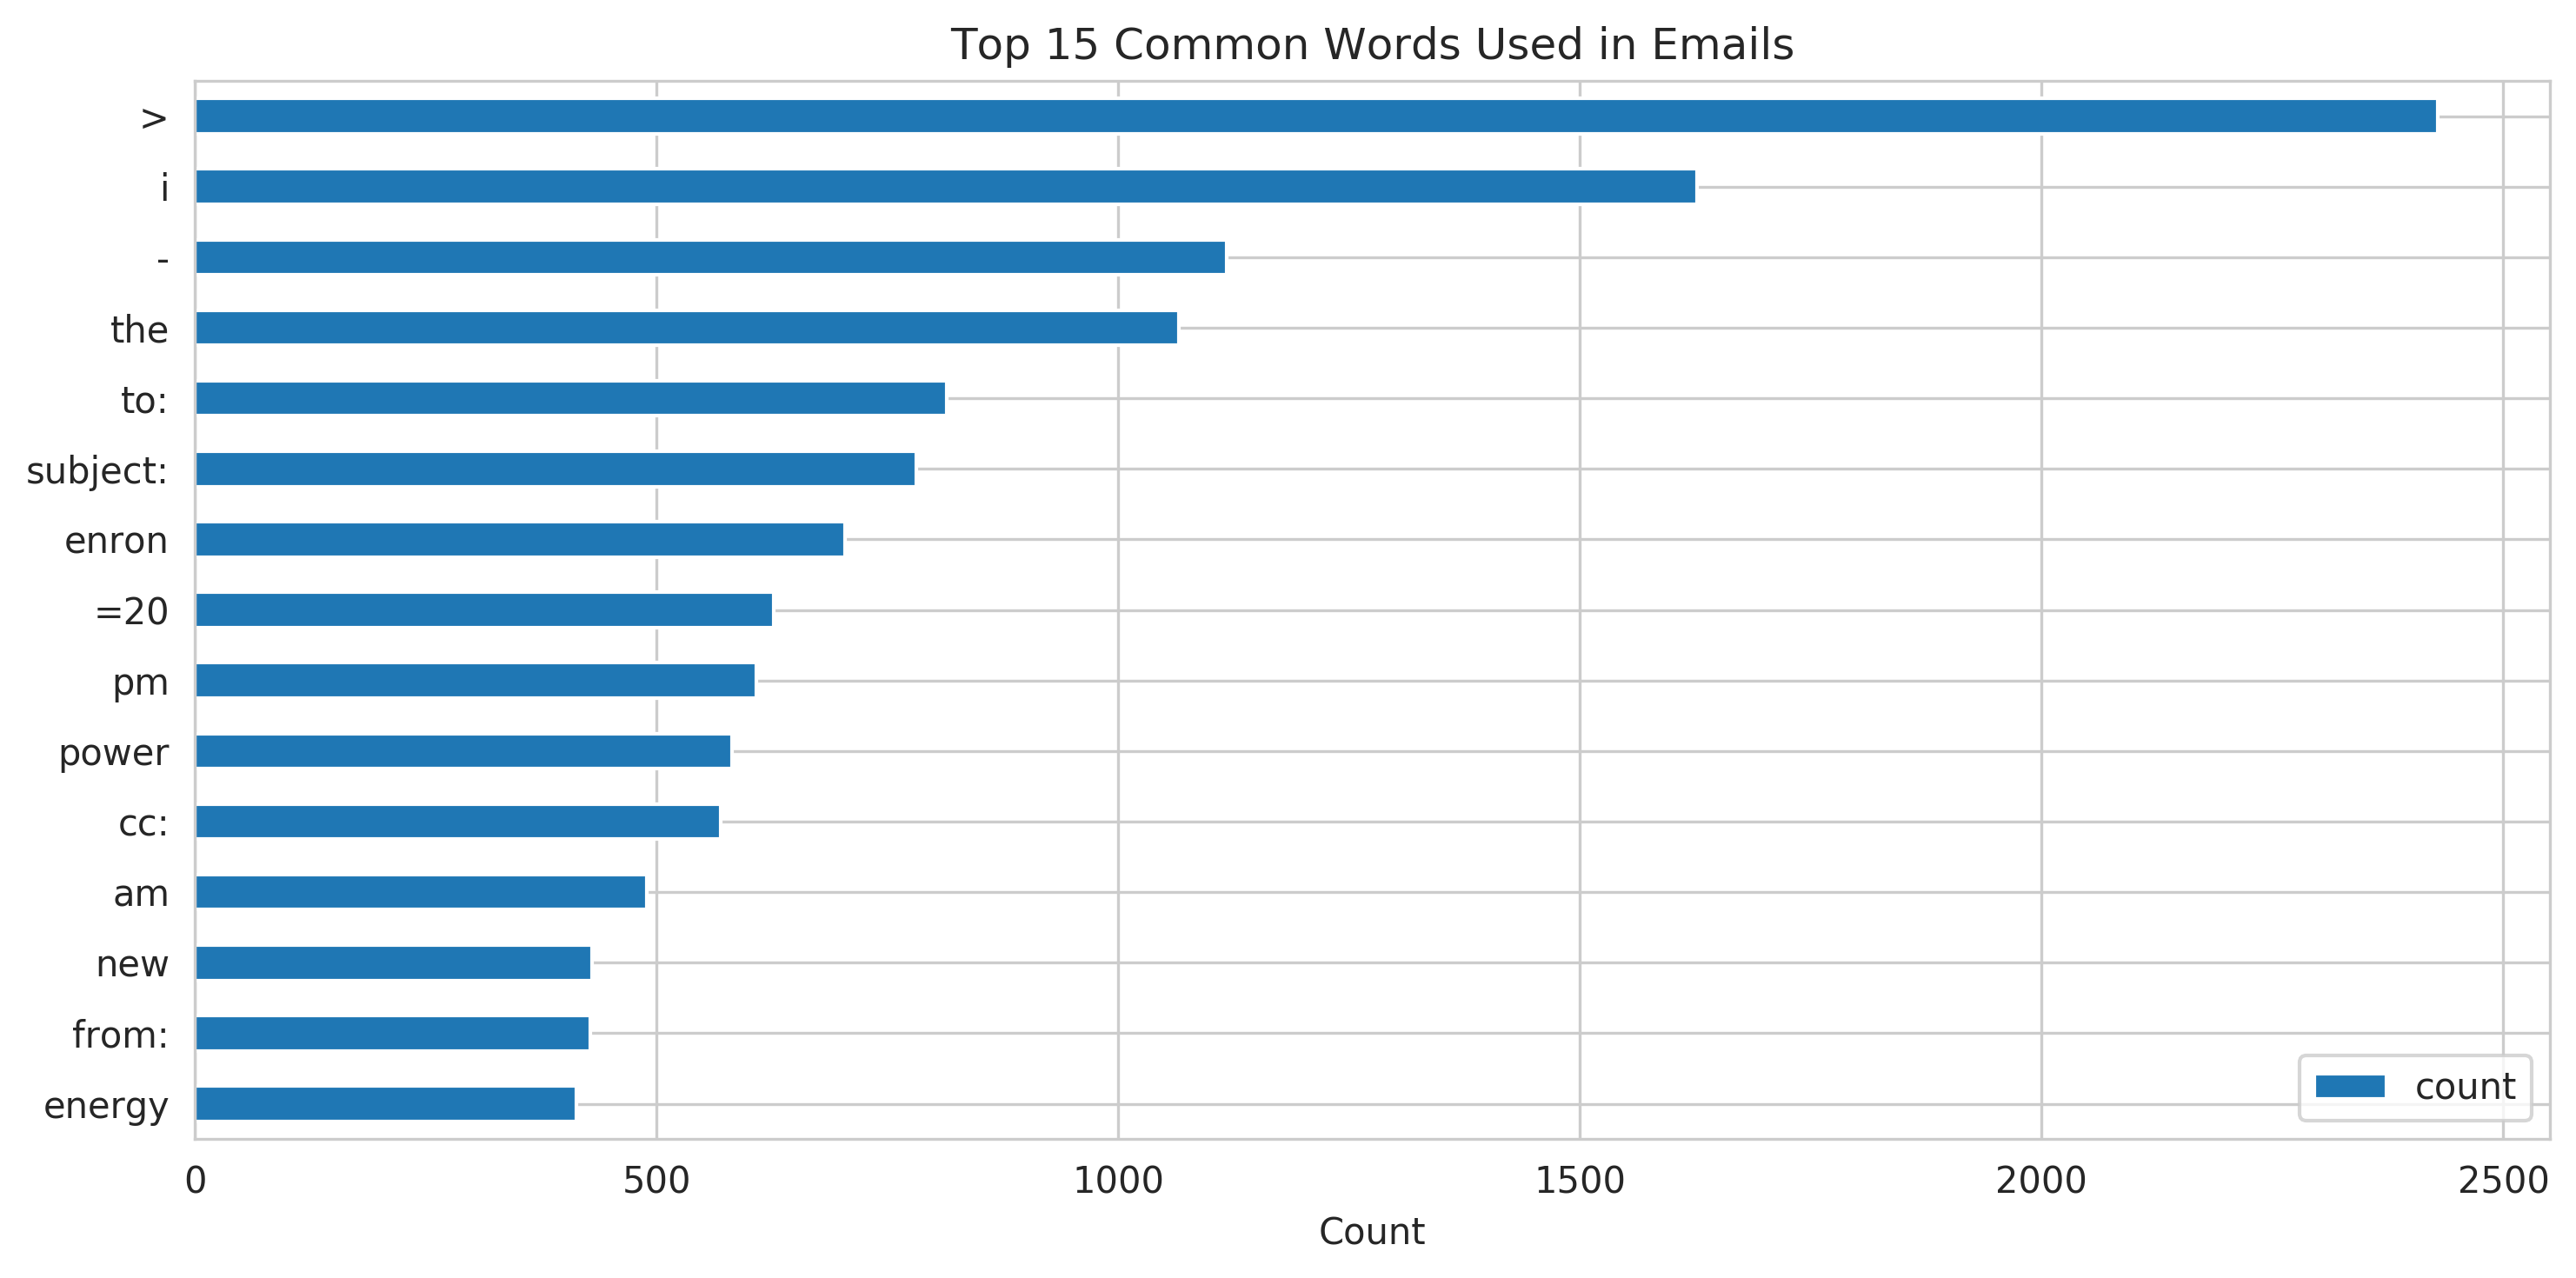

In [ ]:
#@title
fig, ax = plt.subplots(figsize=(10, 5), dpi=300, tight_layout=True)
clean_token.sort_values(by='count').plot.barh(x='words', y='count', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('')
ax.set_title("Top 15 Common Words Used in Emails")
plt.show()

Using pos_tag of nltk to identify adjective, adverb, and noun.

In [ ]:
#@title
pos_tags = nltk.pos_tag(token_extract)

adj = []
adv = []
noun = []

for word, pos in pos_tags:
    if (pos in "JJ"):
        adj.append(word)
    if (pos in "WRB"):
        adv.append(word)
    if (pos in "NN"):
        noun.append(word)

adj_count = collections.Counter(adj)
clean_adj = pd.DataFrame(adj_count.most_common(15), columns=['words', 'count'])

adv_count = collections.Counter(adv)
clean_adv = pd.DataFrame(adv_count.most_common(15), columns=['words', 'count'])

noun_count = collections.Counter(noun)
clean_noun = pd.DataFrame(noun_count.most_common(15), columns=['words', 'count'])


In [ ]:
#@title
display(clean_adj)
display(clean_adv)
display(clean_noun)

,words,count
0,new,430
1,i,357
2,to:,304
3,-----original,263
4,free,150
5,>,143
6,e-mail,140
7,good,110
8,available,104
9,legal,103


,words,count
0,just,231
1,forward,96
2,november,83
3,currently,63
4,here,56
5,probably,53
6,how,47
7,when,46
8,soon,45
9,really,45


,words,count
0,i,1001
1,subject:,626
2,pm,585
3,power,582
4,cc:,530
5,to:,492
6,energy,413
7,from:,382
8,enron,368
9,please,309


### Visualize top 15 most frequently used adjectives

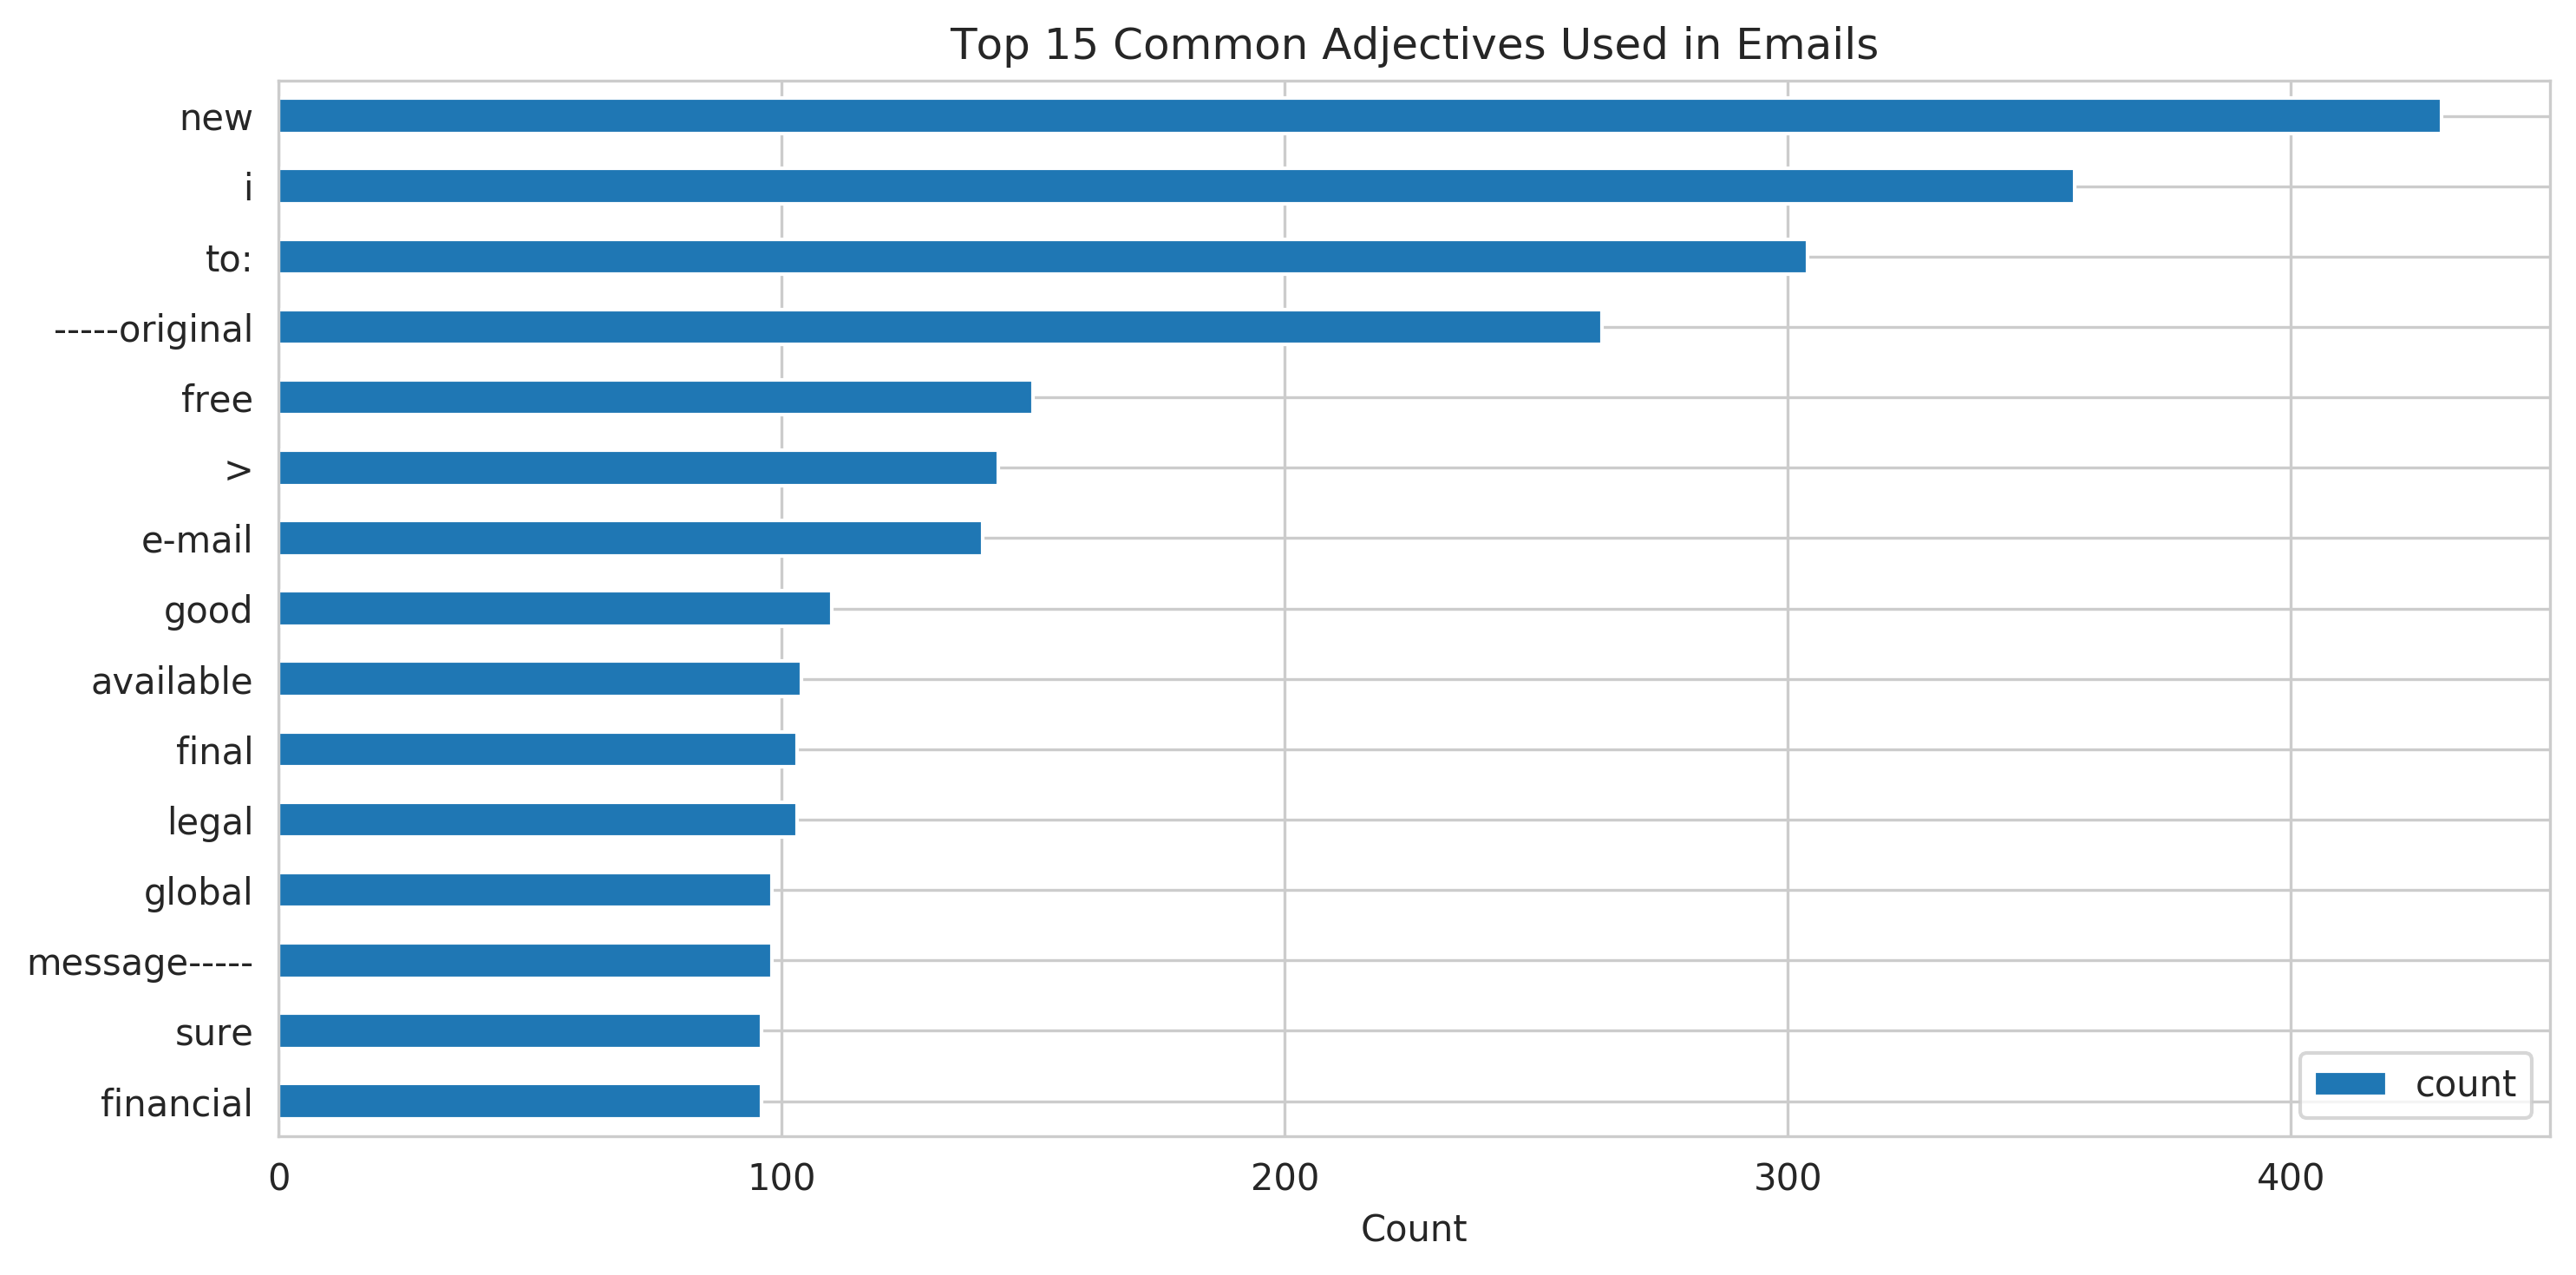

In [ ]:
#@title
fig, ax = plt.subplots(figsize=(10, 5), dpi=300, tight_layout=True)
clean_adj.sort_values(by='count').plot.barh(x='words', y='count', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('')
ax.set_title("Top 15 Common Adjectives Used in Emails")
plt.show()

### Visualize top 15 most frequently used adverbs

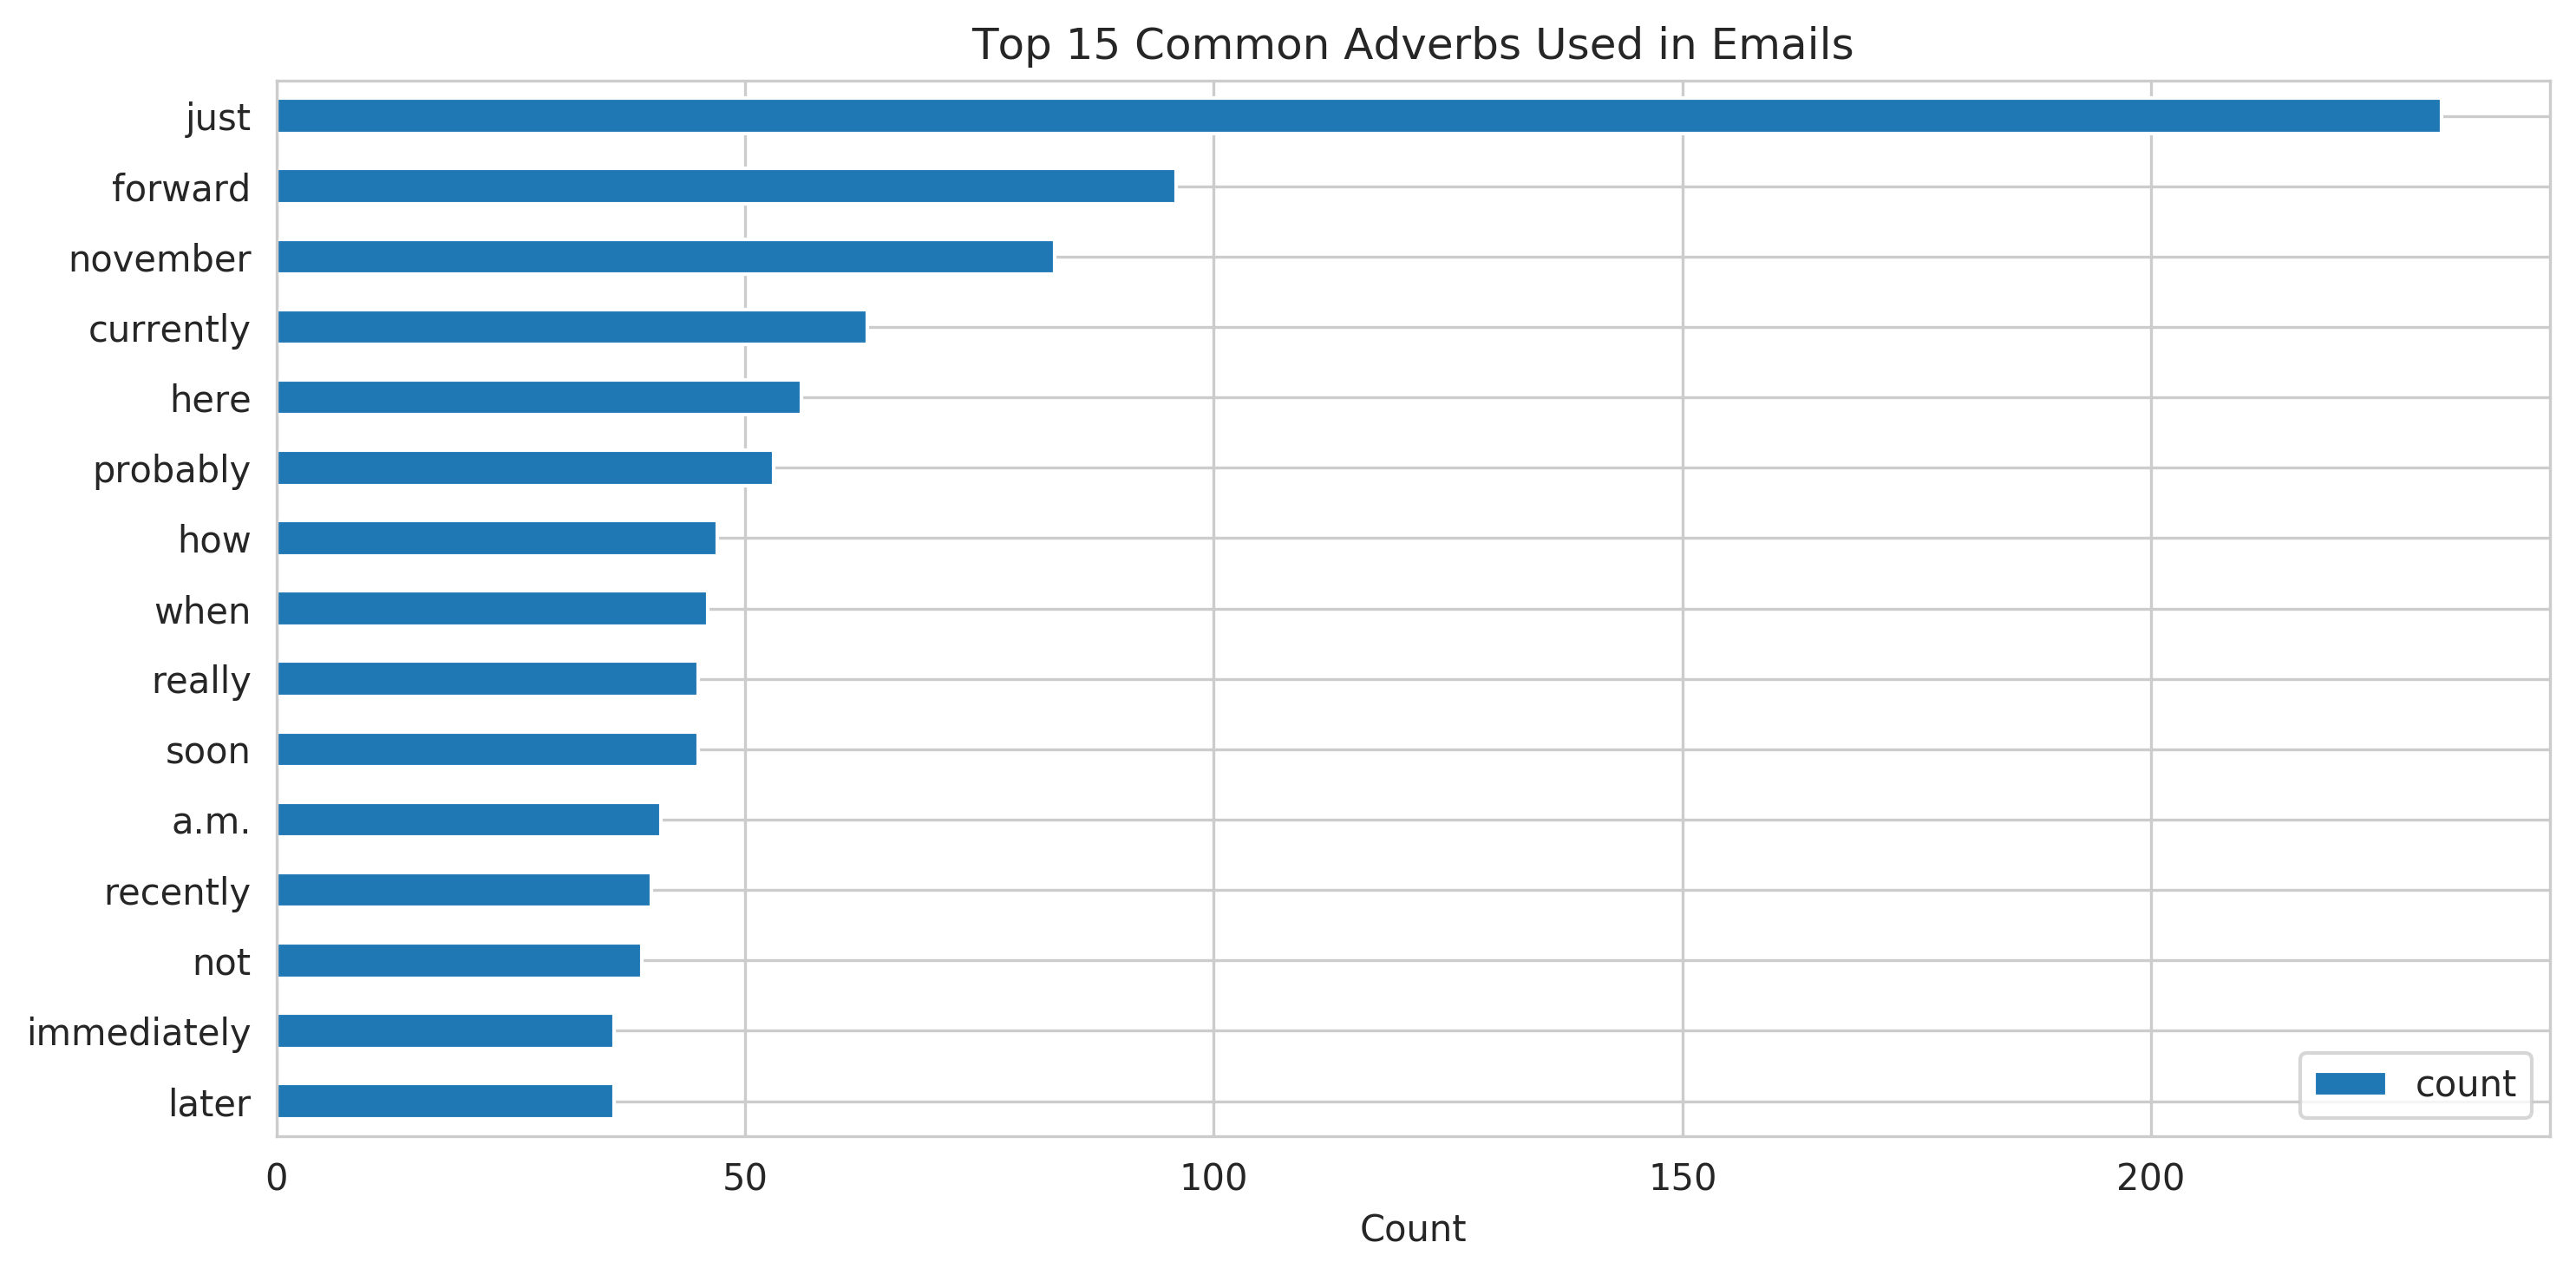

In [ ]:
#@title
fig, ax = plt.subplots(figsize=(10, 5), dpi=300, tight_layout=True)
clean_adv.sort_values(by='count').plot.barh(x='words', y='count', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('')
ax.set_title("Top 15 Common Adverbs Used in Emails")
plt.show()

### Visualize top 15 most frequently used nouns

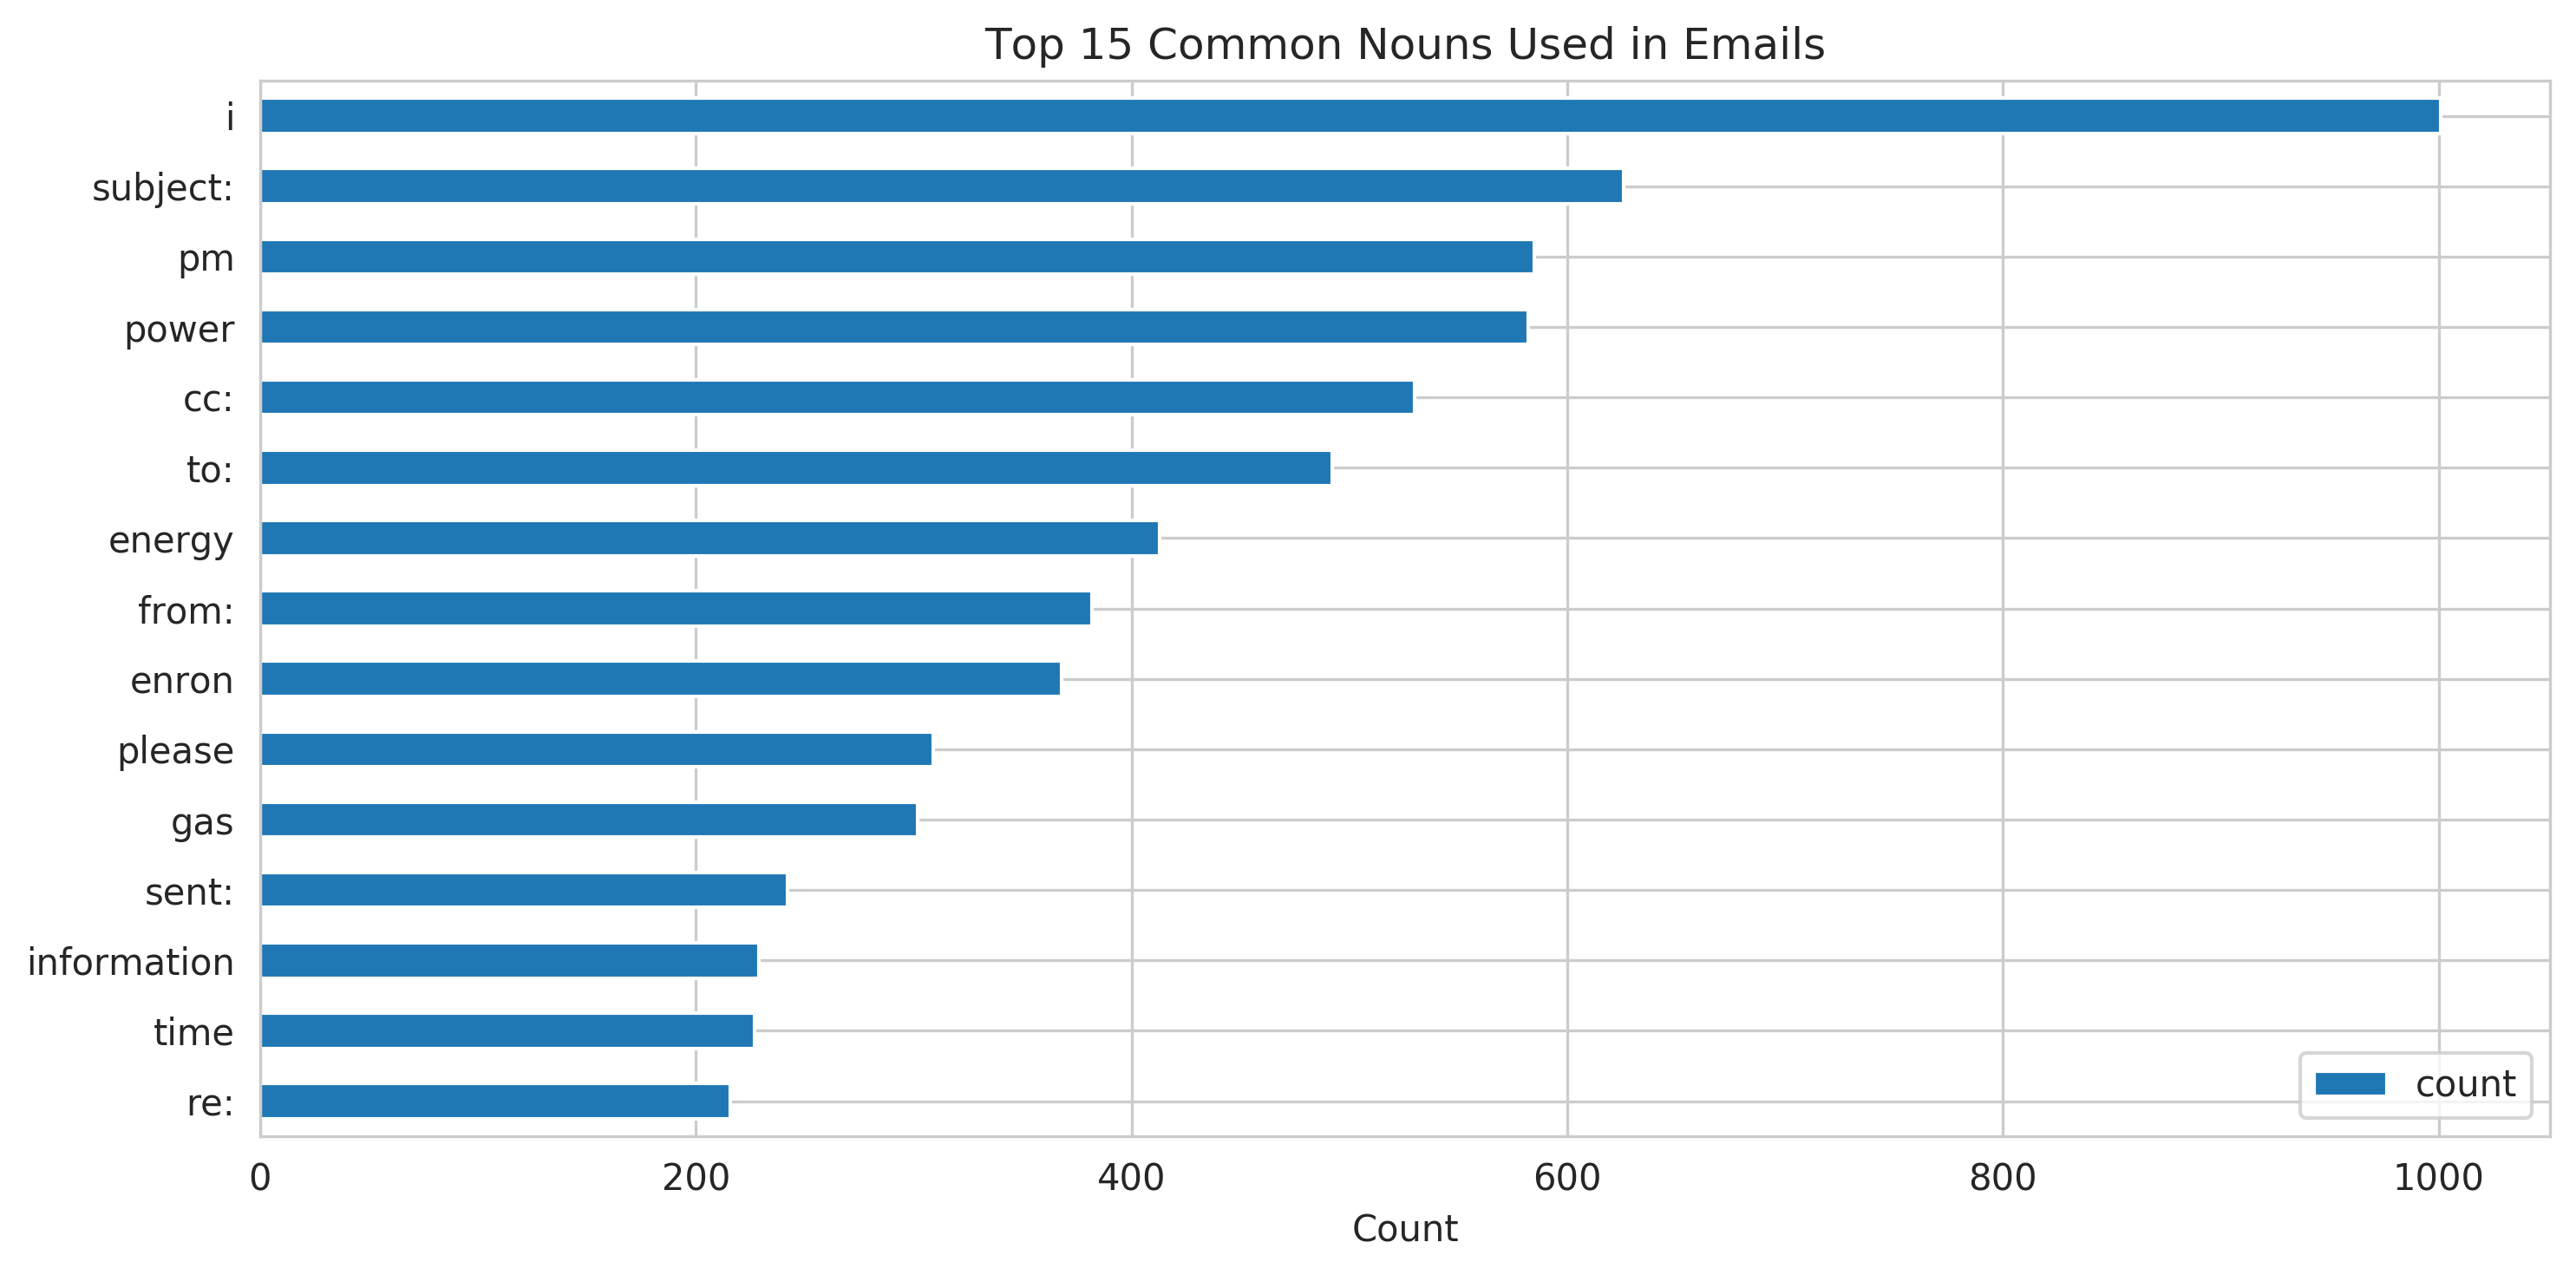

In [ ]:
#@title
# Visualize top 15 most frequently used nouns
fig, ax = plt.subplots(figsize=(10, 5), dpi=300, tight_layout=True)
clean_noun.sort_values(by='count').plot.barh(x='words', y='count', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('')
ax.set_title("Top 15 Common Nouns Used in Emails")
plt.show()

## Proportion of (receivers) internal to external emails

397988 97550


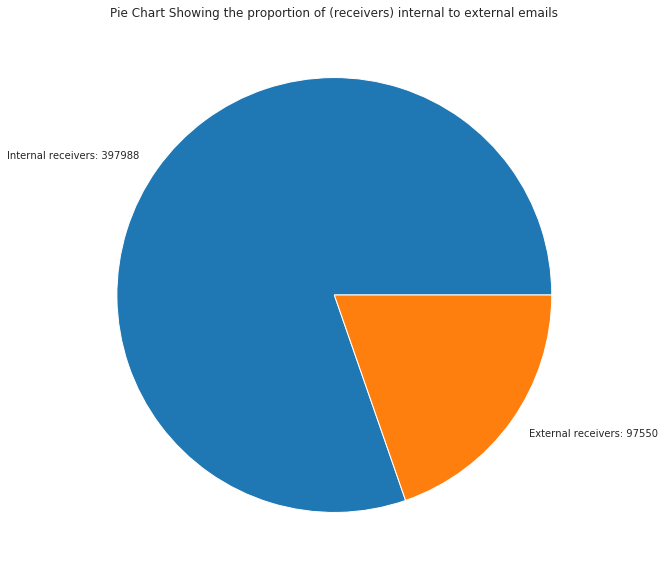

In [ ]:
#@title
internal = 0
external = 0

sub_df = emails_df[['To', 'content', 'Date']].dropna()
sub_df['To'] = sub_df['To'].map(lambda x: next(iter(x)))

for email in sub_df['To']:
    try:
        if 'enron.com' == email.split('@')[1]:
            internal = internal + 1
        else:
            external = external + 1
    except:
        continue
print(internal, external)

plt.figure(figsize=(20,10))
plt.title('Pie Chart Showing the proportion of (receivers) internal to external emails')
plt.pie([internal, external], labels=['Internal receivers: '+str(internal), 'External receivers: '+str(external)])
plt.show()


# Questions for thinking

## Stemming and Lemmatization 

The stemming and lemmzatization part is commented on the preprocessing method in clustering section. Can you do stemming, lemmzatization or both and run the clustering and topic modeling sections and find the differences?

## Clustering

Can you also write other clustering models such as [Gaussian Mixture Models Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) and observe how they are different from K-means clustering?

## Topic modeling

Can you find the differences between clustering and topic modeling?